# Coursework 1: Image filtering

In this coursework we will explore some basic image filters used in computer vision. The corresponding lectures are Lectures 3 and 4 on image filtering and edge detection.

What to do?

* The coursework includes both coding questions and written questions. Please read both the text and code comment in this notebook to get an idea what you are supposed to implement.

* First, run `jupyter-lab` or `jupyter-notebook` in the terminal to start the Jupyter notebook.

* Then, complete and run the code to get the results.

* Finally, please export (File | Export Notebook As...) or print (using the print function of your browser) the notebook as a pdf file, which contains your code, results and answers, and upload the pdf file onto Cate.

Dependencies:

* If you work on a college computer in the Computer Lab, where Ubuntu 18.04 is installed by default, you can use the following virtual environment for your work, where required Python packages are already installed.

`source /vol/bitbucket/wbai/virt/computer_vision_2020/bin/activate`

When you no longer need the virtual environment, you can exit it by running `deactivate`.

* If you work on your own laptop using either Anaconda or plain Python, you can install new packages (such as numpy, imageio etc) running `conda install [package_name]` or `pip3 install [package_name]` in the terminal.




In [0]:
# Import libaries (provided)
import imageio
import numpy as np
import matplotlib.pyplot as plt
import noise
import scipy
import scipy.signal
import math
import time

### 1. Moving average filter. (20 points)

Read a specific input image and add noise to the image. Design a moving average filter of kernel size 3x3, 5x5 and 9x9 respectively. Apply the filter to the input image, show the filtering results and comment on the results.

Design the kernel of the filter by yourself. Then, 2D image filtering can be performed using the function `scipy.signal.convolve2d()`.

Image dimension = (1800, 2400)


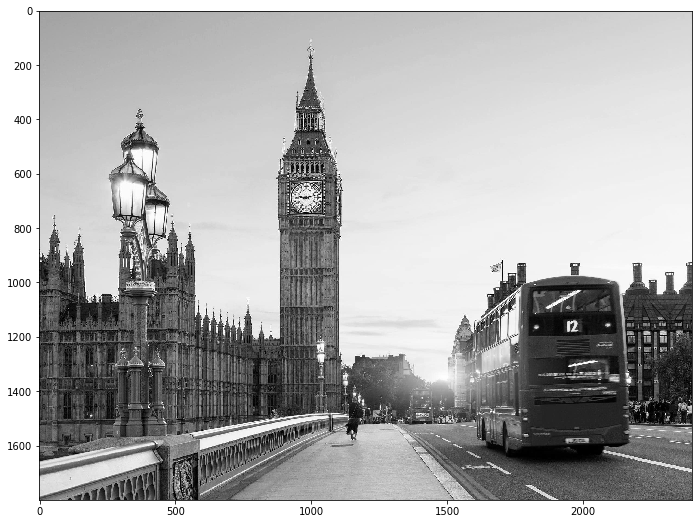

In [20]:
# Read the image (provided)
image = imageio.imread('london.jpg')
print('Image dimension =', image.shape)
plt.imshow(image, cmap='gray')
plt.gcf().set_size_inches(12, 9)

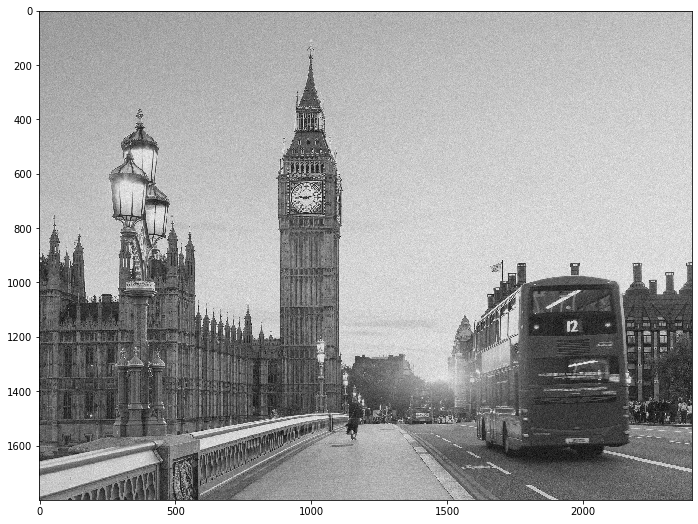

In [21]:
# Corrupt the image with Gaussian noise (provided)
image_noisy = noise.add_noise(image, 'gaussian')
plt.imshow(image_noisy, cmap='gray')
plt.gcf().set_size_inches(12, 9)

**Note: from now on, please use the noisy image as the input for the filters.**

### 1.1 Filter the noisy image with a 3x3 moving average filter. (5 points)

Filter h:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


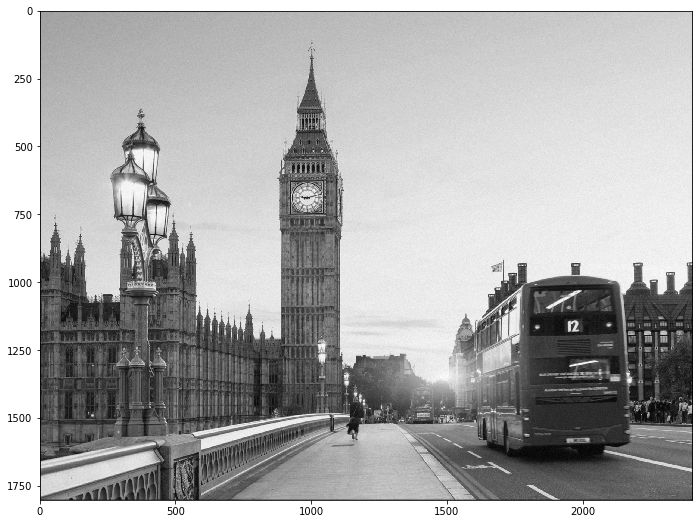

In [22]:
# Design the filter h
figure_size = 3
h = np.ones((figure_size,figure_size))/(figure_size*figure_size)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h)


# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(12, 9)

### 1.2 Filter the noisy image with a 5x5 moving average filter. (5 points)

Filter h:
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


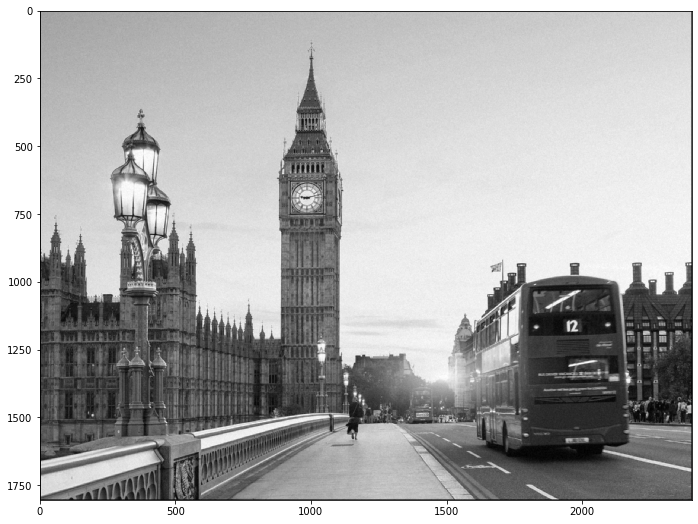

In [23]:
# Design the filter h
figure_size = 5
h = np.ones((figure_size,figure_size))/(figure_size*figure_size)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h)


# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(12, 9)

### 1.3 Filter the noisy image with a 9x9 moving average filter. (5 points)

Filter h:
[[0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]]


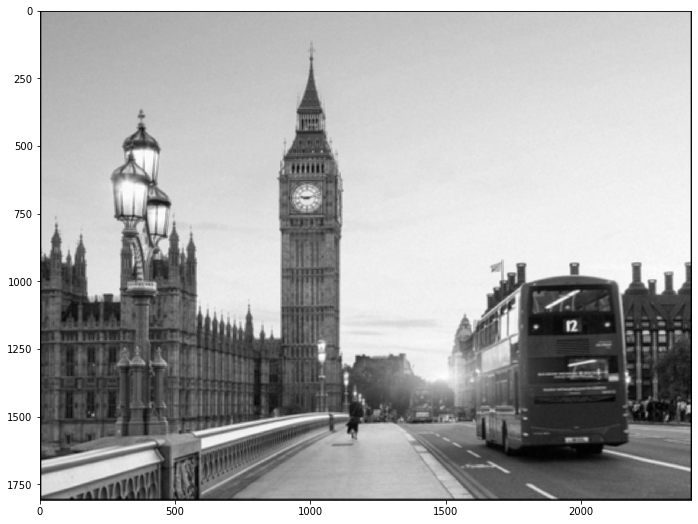

In [24]:
# Design the filter h
figure_size = 9
h = np.ones((figure_size,figure_size))/(figure_size*figure_size)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h)


# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(12, 9)

### 1.4 Comment on the filtering results. How do different kernel sizes influence the filtering results? (5 points)

The moving average filter smooths the noisy image. According to the result, the 5x5 filter gives the best output image, whereas there is a liitle bit noise using the 3x3 filter. The 9x9 kernel has the blurriest output among the three filters. This is because that as the kernel sizes increases, it gives a better smoothing effect but the filtered image becomes blurrier.    


### 2. Edge detection. (45 points)

Perform edge detection using Sobel filters, as well as Gaussian + Sobel filters. Display the magnitude image of the Sobel filtering result and comment.

### 2.1 Implement 3x3 Sobel filters and convolve with the noisy image. (5 points)

h_sobel_x:
[[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]]
h_sobel_y:
[[ 1.  2.  1.]
 [ 0.  0.  0.]
 [-1. -2. -1.]]


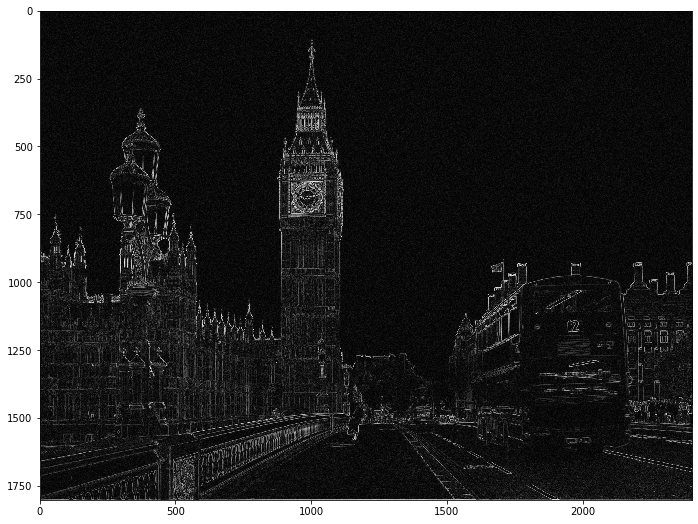

In [25]:
# Design the Sobel filters
figure_size = 3
_x, _y = np.meshgrid(np.linspace(1,-1,figure_size), np.linspace(1,-1,figure_size))
_x[1] += _x[0]

h_sobel_x = _x
h_sobel_y = np.transpose(_x)

# Sobel filtering
g_x = scipy.signal.convolve2d(image_noisy, h_sobel_x)
g_y = scipy.signal.convolve2d(image_noisy, h_sobel_y)

# Calculate the gradient magnitude
sobel_mag = np.sqrt(g_x**2+g_y**2)

# Print the filters (provided)
print('h_sobel_x:')
print(h_sobel_x)
print('h_sobel_y:')
print(h_sobel_y)

# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray')
plt.gcf().set_size_inches(12, 9)

### 2.2 Design a 2D Gaussian filter. (8 points)

[[7.16421173e-10 1.50723541e-09 3.05799695e-09 ... 3.05799695e-09
  1.50723541e-09 7.16421173e-10]
 [1.50723541e-09 3.17098191e-09 6.43353583e-09 ... 6.43353583e-09
  3.17098191e-09 1.50723541e-09]
 [3.05799695e-09 6.43353583e-09 1.30528601e-08 ... 1.30528601e-08
  6.43353583e-09 3.05799695e-09]
 ...
 [3.05799695e-09 6.43353583e-09 1.30528601e-08 ... 1.30528601e-08
  6.43353583e-09 3.05799695e-09]
 [1.50723541e-09 3.17098191e-09 6.43353583e-09 ... 6.43353583e-09
  3.17098191e-09 1.50723541e-09]
 [7.16421173e-10 1.50723541e-09 3.05799695e-09 ... 3.05799695e-09
  1.50723541e-09 7.16421173e-10]]


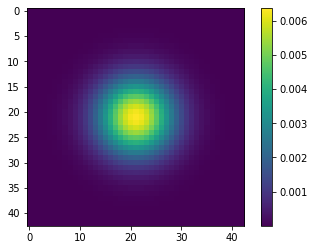

In [26]:
# Design the Gaussian filter
def gaussian_filter_2d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 2D array for the Gaussian kernel
    figure_size = 43
    x, y = np.meshgrid(np.linspace(-sigma*4,sigma*4,figure_size), np.linspace(-sigma*4,sigma*4,figure_size))
    power = -(x**2+y**2)/(2*sigma**2)
    constant =  1/(2*math.pi*sigma**2)
    h = constant*np.exp(power)
    return h

# Display the Gaussian filter when sigma = 3 pixel (provided)
sigma = 5
h = gaussian_filter_2d(sigma)
print(h)
plt.imshow(h)
plt.colorbar()

### 2.3 Perform Gaussian smoothing ($\sigma$ = 3 pixels), followed by Sobel filtering. (5 points)

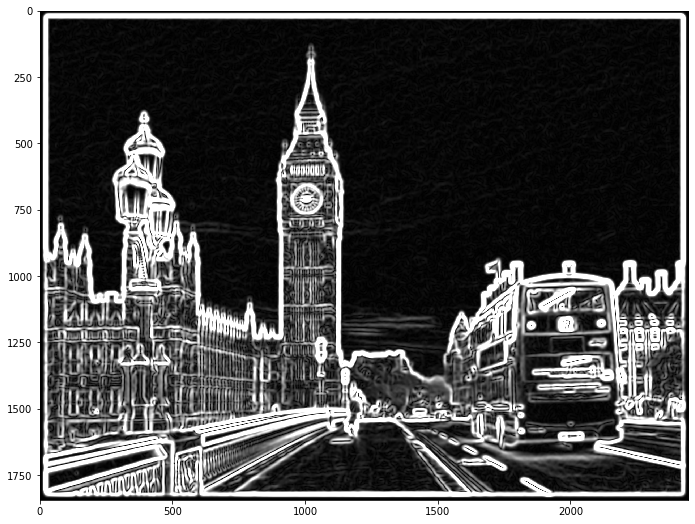

In [27]:
# Perform Gaussian smoothing before Sobel filtering
sigma = 3
h_gaussian = gaussian_filter_2d(sigma)
filter_gaussian = scipy.signal.convolve2d(image_noisy, h_gaussian)

# Sobel filtering
sobel_x = scipy.signal.convolve2d(filter_gaussian, h_sobel_x)
sobel_y = scipy.signal.convolve2d(filter_gaussian, h_sobel_y)

# Calculate the gradient magnitude
sobel_mag = np.sqrt(sobel_x**2+sobel_y**2)

# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(12, 9)

### 2.4 Perform Gaussian smoothing ($\sigma$ = 7 pixels), followed by Sobel filtering. Evaluate the computational time for Gaussian smoothing. (7 points)

time_elapsed: 26.937867606999987


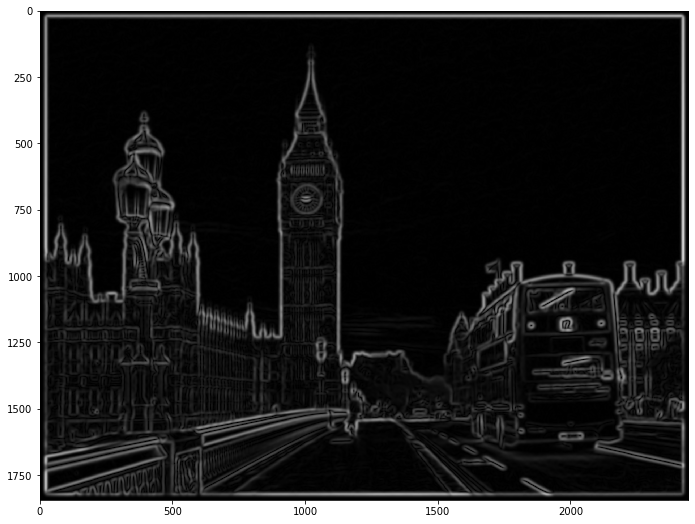

In [28]:
# Perform Gaussian smoothing before Sobel filtering
sigma = 7
h_gaussian = gaussian_filter_2d(sigma)
time_start = time.process_time()
filter_gaussian = scipy.signal.convolve2d(image_noisy, h_gaussian)
time_elapsed = (time.process_time() - time_start)
print(f"time_elapsed: {time_elapsed}")

# Sobel filtering
sobel_x = scipy.signal.convolve2d(filter_gaussian, h_sobel_x)
sobel_y = scipy.signal.convolve2d(filter_gaussian, h_sobel_y)

# Calculate the gradient magnitude
sobel_mag = np.sqrt(sobel_x**2+sobel_y**2)


# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(12, 9)

### 2.5 Design 1D Gaussian filters along x-axis and y-axis respectively. (8 points)

[1.91186037e-05 4.02224802e-05 8.16065102e-05 1.59670267e-04
 3.01277417e-04 5.48216864e-04 9.62014211e-04 1.62799800e-03
 2.65686527e-03 4.18146515e-03 6.34644783e-03 9.28915546e-03
 1.31118820e-02 1.78483107e-02 2.34300107e-02 2.96613654e-02
 3.62120471e-02 4.26342177e-02 4.84068480e-02 5.30027733e-02
 5.59672113e-02 5.69917543e-02 5.59672113e-02 5.30027733e-02
 4.84068480e-02 4.26342177e-02 3.62120471e-02 2.96613654e-02
 2.34300107e-02 1.78483107e-02 1.31118820e-02 9.28915546e-03
 6.34644783e-03 4.18146515e-03 2.65686527e-03 1.62799800e-03
 9.62014211e-04 5.48216864e-04 3.01277417e-04 1.59670267e-04
 8.16065102e-05 4.02224802e-05 1.91186037e-05]


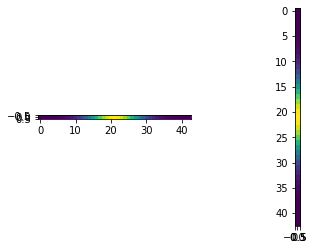

In [29]:
# Design the Gaussian filter
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 1D array for the Gaussian kernel
    figure_size = 43
    x = np.linspace(-sigma*4,sigma*4,figure_size)
    power = -(x**2)/(2*sigma**2)
    constant = math.sqrt(1/(2*math.pi*sigma**2))
    h = constant*np.exp(power)
    return h

# sigma = 7 pixel (provided)
sigma = 7

h = gaussian_filter_1d(sigma)
print(h)
# The Gaussian filter along x-axis. Its shape is (1, sz).
h_x = np.reshape(h,(1,h.size))

# The Gaussian filter along y-axis. Its shape is (sz, 1).
h_y = np.reshape(h,(h.size,1))

# Display the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)


### 2.6 Perform Gaussian smoothing (sigma = 7 pixels) using two separable filters, then apply the Sobel filters. Evaluate the computational time for separable Gaussian filtering. (7 points)

time_elapsed: 2.497886135000016


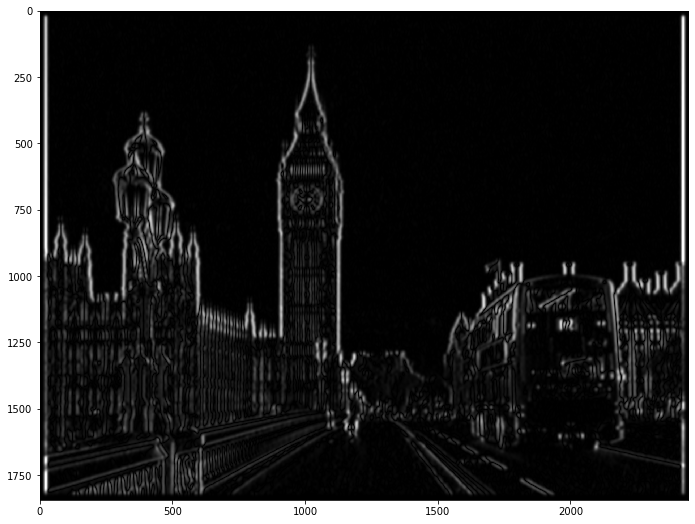

In [30]:
# Perform separable Gaussian smoothing before Sobel filtering
time_start = time.process_time()
ga_x = scipy.signal.convolve2d(image_noisy, h_x)
ga_y = scipy.signal.convolve2d(ga_x, h_y)
time_elapsed = (time.process_time() - time_start)
print(f"time_elapsed: {time_elapsed}")

# Sobel filtering
sobel_x = scipy.signal.convolve2d(ga_y, h_sobel_x)
sobel_y = scipy.signal.convolve2d(ga_y, h_sobel_y)

# Calculate the gradient magnitude
sobel_mag = np.sqrt(np.square(sobel_x)+np.square(sobel_x))

# Display the magnitude image (provided)

plt.imshow(sobel_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(12, 9)

### 2.7 Comment on the Gaussian + Sobel filtering results and the computational time. (5 points)

Using only Sobel filter gives a noisy edge detection output. Adding a Gaussian filter beforehand can help to smooth the image first(reduce the noise), then apply Sobel filter so that the output image is less affected by the noise which gives a clearer and sharper edges.

The computational time of 1D Gaussian filter takes roughly 24.44 seconds less than using the 2D filter(with kernel size of 43). This is because that applying the separable 1D Gaussian filter convolves the noisy image with 1x43 filter first then follow by a 43x1 filter. Whereas it is less efficient to convolve the image with a 43x43 filter.


### 3. Laplacian filter. (20 points)

Perform Laplacian filtering and Laplacian of Gaussian filtering. Display the results and comment.

### 3.1 Implement a 3x3 Laplacian filter. (5 points)

h:
[[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]


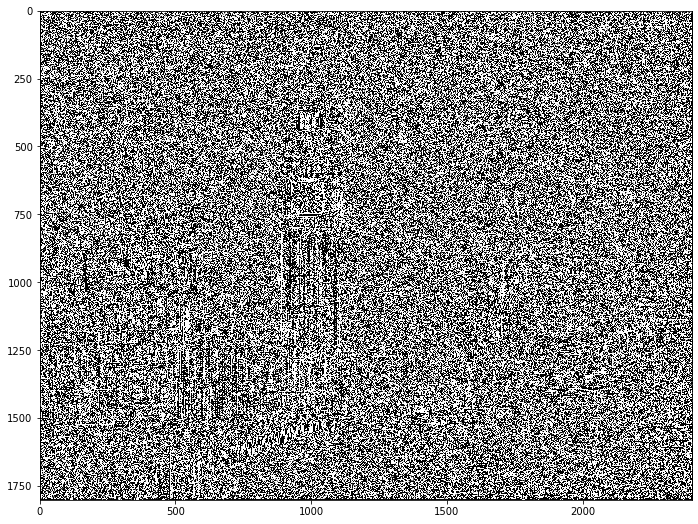

In [31]:
# Design the filter
h = np.array([[0.,1.,0.], [1.,-4.,1],[0.,1.,0.]])
# h_smooth = np.array([[1.,0.,-1.], [2.,0.,-2],[1.,0.,-1.]])
# smooth = scipy.signal.convolve2d(image_noisy, h_smooth)

# Laplacian filtering

lap = scipy.signal.convolve2d(image_noisy,h)

# Print the filter (provided)
print('h:')
print(h)

# Display the filtering result (provided)
plt.imshow(lap, cmap='gray', vmin=-10, vmax=10)
#plt.imshow(lap, cmap='gray')
plt.gcf().set_size_inches(12, 9)

### 3.2 Implement the Laplacian of Gaussian filter ($\sigma$ = 3 pixel). (10 points)

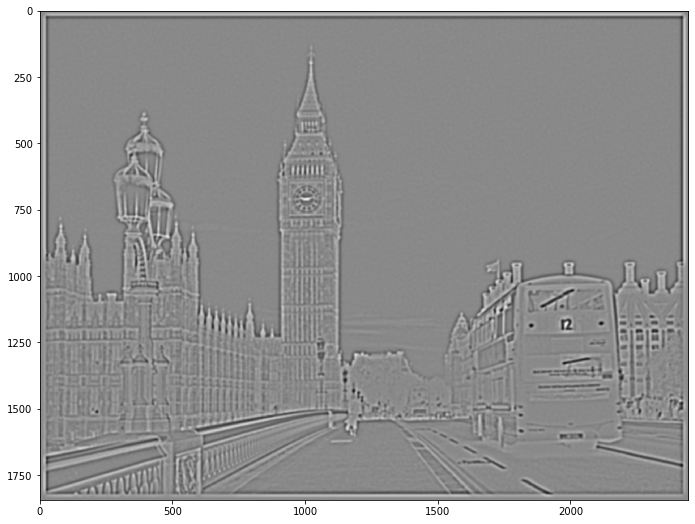

In [32]:
# Design the Gaussian filters
sigma = 3
h_gaussian = gaussian_filter_1d(sigma)

# The Gaussian filter along x-axis. Its shape is (1, sz).
g_x = np.reshape(h_gaussian,(1,h_gaussian.size))

# The Gaussian filter along y-axis. Its shape is (sz, 1).
g_y = np.reshape(h_gaussian,(h_gaussian.size,1))

# Gaussian smoothing
ga_x = scipy.signal.convolve2d(image_noisy, g_x)
ga_y = scipy.signal.convolve2d(ga_x, g_y)

# Design the Laplacian filter
h_lap = np.array([[0.,1.,0.], [1.,-4.,1],[0.,1.,0.]])

# Laplacian filtering
lap = scipy.signal.convolve2d(ga_y,h_lap)

# Display the filtering result (provided)
plt.imshow(lap, cmap='gray')#, vmin=-10, vmax=10)
plt.gcf().set_size_inches(12, 9)

### 3.3 Comments on the filtering results. (5 points)

Applying only Laplacian filter gives a very noisy output image since it is the sum of second derivatives which is even more sensitive to the noise than the first derivative. Thus, the Gaussian filter can help to smooth the image before using Laplacian filter. The output result of 3.2 is greyish but much more smooth than 3.1.


### 4. Exploration: Implement the 3x3 moving average filter using Pytorch. (15 points)

[Pytorch](https://pytorch.org/) is a machine learning framework that supports filtering and convolution.

The [Conv2D](https://pytorch.org/docs/stable/nn.html#conv2d) operator takes an input array of dimension NxC1xXxY, applies the filter and outputs an array of dimension NxC2xXxY. Here, since we only have one image with one colour channel, we will set N=1, C1=1 and C2=1. You can read the documentation of Conv2D for more detail.

In [0]:
# Import libaries (provided)
import torch

### 4.1 Expand the dimension of the noisy image into 1x1xXxY and convert it to a Pytorch tensor. (5 points)

In [34]:
# Expand the dimension of the numpy array
expand_image = np.expand_dims(image_noisy,axis=0)
expand_image = np.expand_dims(expand_image,axis=0)



# Convert to a Pytorch tensor using torch.from_numpy
noisy_image_tensor = torch.from_numpy(expand_image).float()
noisy_image_tensor.shape

torch.Size([1, 1, 1800, 2400])

### 4.2 Create a Pytorch Conv2D filter, set its kernel to be a 3x3 moving averaging filter. (5 points)

In [35]:
# Create the Conv2D filter (provided)
conv = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1, bias=False)

# Set the kernel weight
figure_size = 3
# w = torch.empty(3,3)
# torch.nn.init.ones_(w).double()
w = torch.ones(3,3)
w = w/(figure_size**2)
w = w.expand(conv.weight.size())
print(conv.weight.size)
conv.weight = torch.nn.Parameter(w,requires_grad=False)
print(conv.weight)
w.shape

<built-in method size of Parameter object at 0x7f6ede7a8e58>
Parameter containing:
tensor([[[[0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111]]]])


torch.Size([1, 1, 3, 3])

### 4.3 Apply the filter to the noisy image tensor and display the output image. (5 points)

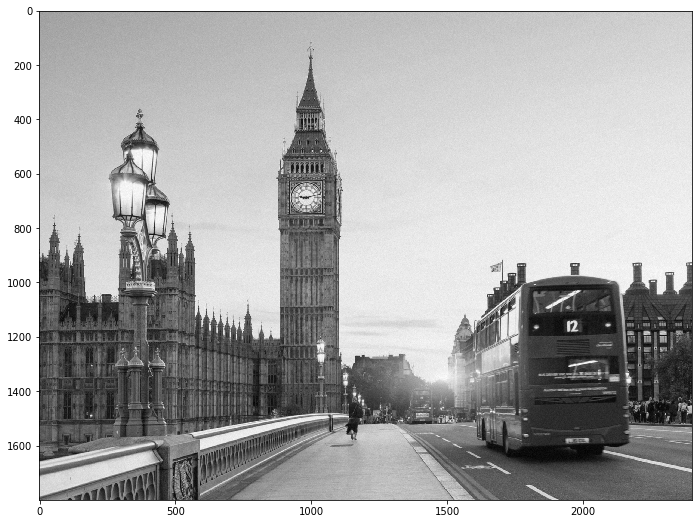

In [36]:
# Filtering
image_filtered = conv(noisy_image_tensor)
image_filtered = torch.squeeze(image_filtered)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(12, 9)

### 5. Survey: How many hours does it take you to complete the coursework?

Roughly 8 hours 